In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import time
import sklearn
import scipy

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

In [3]:
heart = pd.read_csv('FinalHeart.csv')
heart.head(3)

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0.0
1,1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2.0
2,2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1.0


In [4]:
heart.drop(['Unnamed: 0'],axis=1,inplace=True)
heart.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1.0


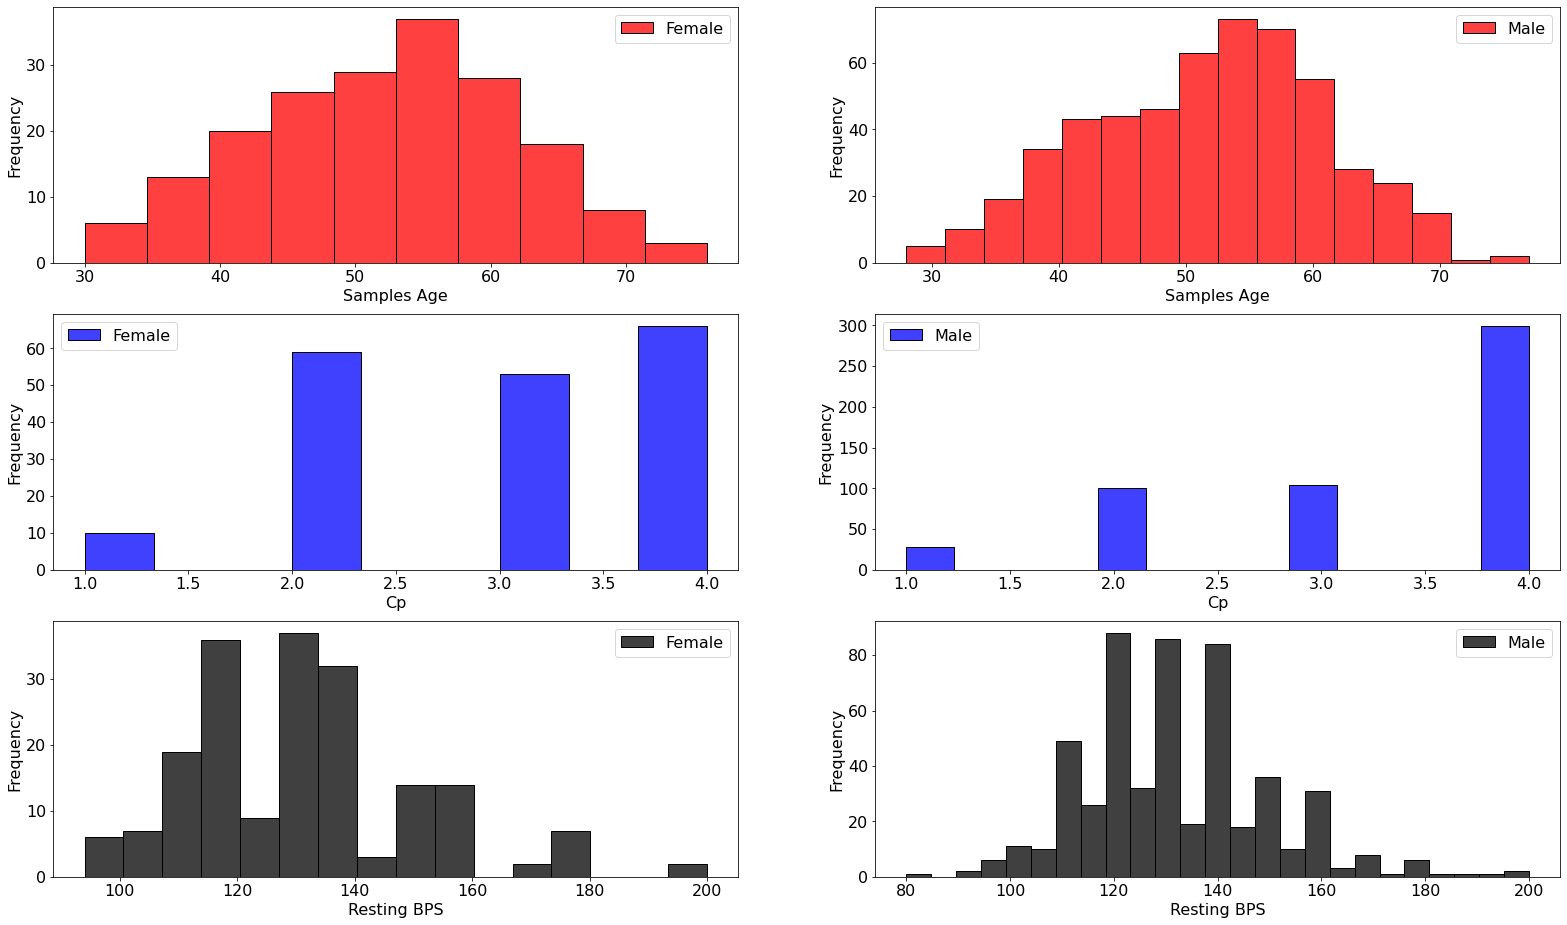

In [5]:
fig, axis = plt.subplots(3,2,figsize=(27,16))

sns.histplot(data = heart.loc[heart['sex']==0.0,:], x = 'age', color = 'red',ax = axis[0,0], label = 'Female')
axis[0,0].set_xlabel('Samples Age',fontsize=16)
axis[0,0].set_ylabel('Frequency',fontsize=16)
axis[0,0].tick_params(axis='both',labelsize=16)
axis[0,0].legend(fontsize=16)

sns.histplot(data = heart.loc[heart['sex']==1.0,:], x = 'age', color = 'red',ax = axis[0,1], label = 'Male')
axis[0,1].set_xlabel('Samples Age',fontsize=16)
axis[0,1].set_ylabel('Frequency',fontsize=16)
axis[0,1].tick_params(axis='both',labelsize=16)
axis[0,1].legend(fontsize=16)

sns.histplot(data = heart.loc[heart['sex']==0.0,:], x = 'cp', color = 'blue',ax = axis[1,0], label = 'Female')
axis[1,0].set_xlabel('Cp',fontsize=16)
axis[1,0].set_ylabel('Frequency',fontsize=16)
axis[1,0].tick_params(axis='both',labelsize=16)
axis[1,0].legend(fontsize=16)

sns.histplot(data = heart.loc[heart['sex']==1.0,:], x = 'cp', color = 'blue',ax = axis[1,1], label = 'Male')
axis[1,1].set_xlabel('Cp',fontsize=16)
axis[1,1].set_ylabel('Frequency',fontsize=16)
axis[1,1].tick_params(axis='both',labelsize=16)
axis[1,1].legend(fontsize=16)

sns.histplot(data = heart.loc[heart['sex']==0.0,:], x = 'trestbps', color = 'black',ax = axis[2,0], label = 'Female')
axis[2,0].set_xlabel('Resting BPS',fontsize=16)
axis[2,0].set_ylabel('Frequency',fontsize=16)
axis[2,0].tick_params(axis='both',labelsize=16)
axis[2,0].legend(fontsize=16)

sns.histplot(data = heart.loc[heart['sex']==1.0,:], x = 'trestbps', color = 'black',ax = axis[2,1], label = 'Male')
axis[2,1].set_xlabel('Resting BPS',fontsize=16)
axis[2,1].set_ylabel('Frequency',fontsize=16)
axis[2,1].tick_params(axis='both',labelsize=16)
axis[2,1].legend(fontsize=16);

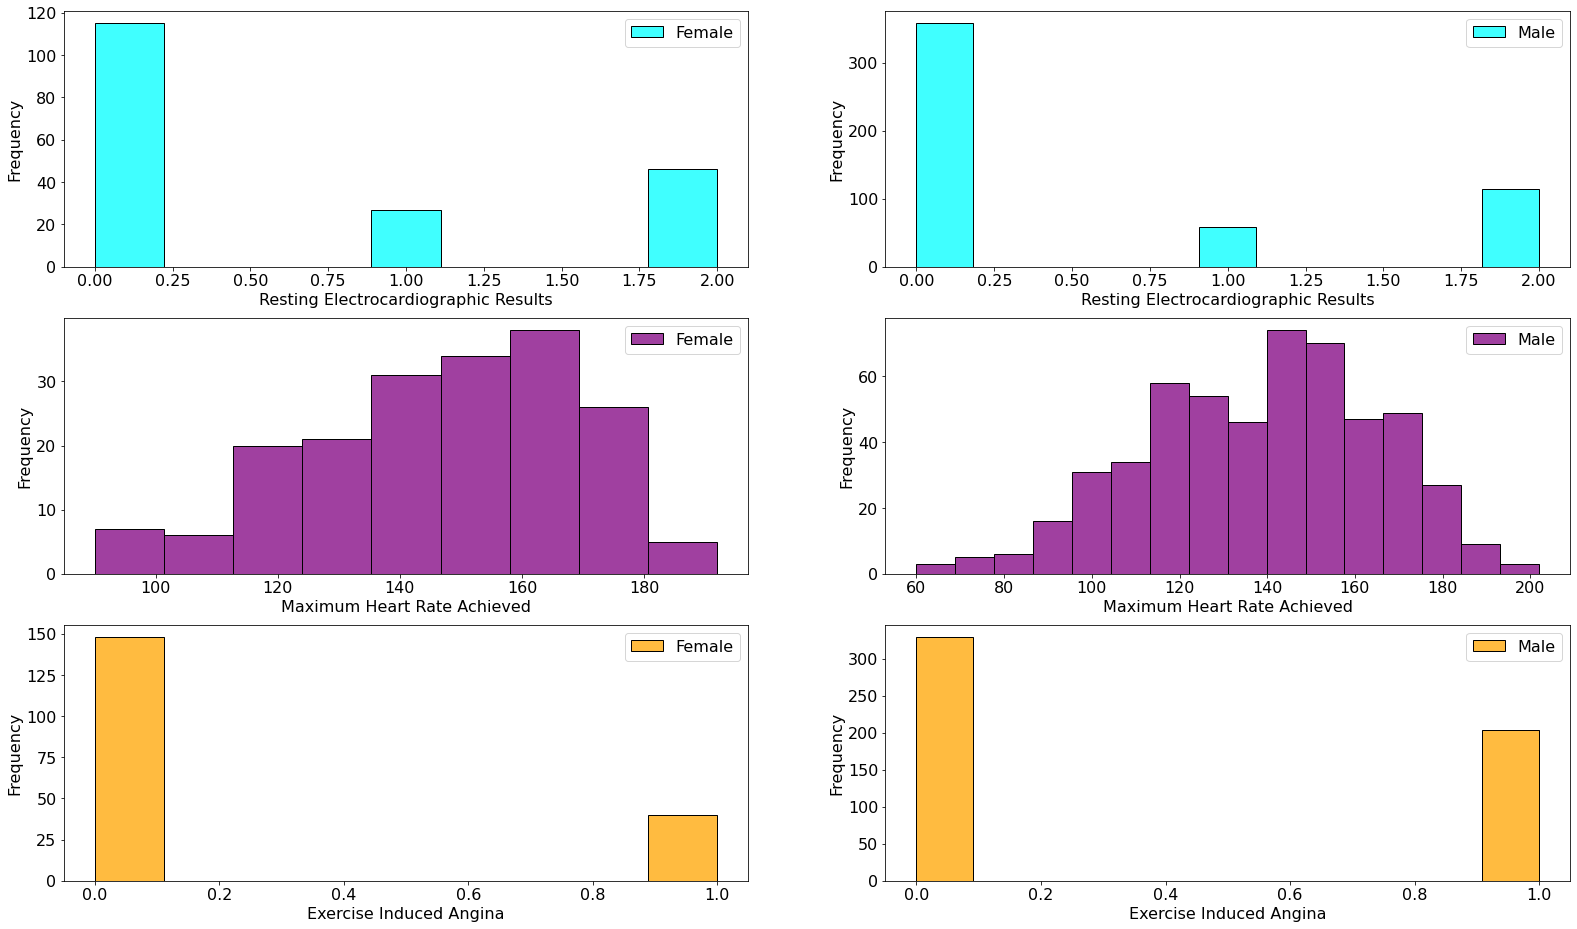

In [6]:
fig, axis = plt.subplots(3,2,figsize=(27,16))

sns.histplot(data = heart.loc[heart['sex']==0.0,:], x = 'restecg', color = 'cyan',ax = axis[0,0], label = 'Female')
axis[0,0].set_xlabel('Resting Electrocardiographic Results',fontsize=16)
axis[0,0].set_ylabel('Frequency',fontsize=16)
axis[0,0].tick_params(axis='both',labelsize=16)
axis[0,0].legend(fontsize=16)

sns.histplot(data = heart.loc[heart['sex']==1.0,:], x = 'restecg', color = 'cyan',ax = axis[0,1], label = 'Male')
axis[0,1].set_xlabel('Resting Electrocardiographic Results',fontsize=16)
axis[0,1].set_ylabel('Frequency',fontsize=16)
axis[0,1].tick_params(axis='both',labelsize=16)
axis[0,1].legend(fontsize=16)

sns.histplot(data = heart.loc[heart['sex']==0.0,:], x = 'thalach', color = 'purple',ax = axis[1,0], label = 'Female')
axis[1,0].set_xlabel('Maximum Heart Rate Achieved',fontsize=16)
axis[1,0].set_ylabel('Frequency',fontsize=16)
axis[1,0].tick_params(axis='both',labelsize=16)
axis[1,0].legend(fontsize=16)

sns.histplot(data = heart.loc[heart['sex']==1.0,:], x = 'thalach', color = 'purple',ax = axis[1,1], label = 'Male')
axis[1,1].set_xlabel('Maximum Heart Rate Achieved',fontsize=16)
axis[1,1].set_ylabel('Frequency',fontsize=16)
axis[1,1].tick_params(axis='both',labelsize=16)
axis[1,1].legend(fontsize=16)

sns.histplot(data = heart.loc[heart['sex']==0.0,:], x = 'exang', color = 'orange',ax = axis[2,0], label = 'Female')
axis[2,0].set_xlabel('Exercise Induced Angina',fontsize=16)
axis[2,0].set_ylabel('Frequency',fontsize=16)
axis[2,0].tick_params(axis='both',labelsize=16)
axis[2,0].legend(fontsize=16)

sns.histplot(data = heart.loc[heart['sex']==1.0,:], x = 'exang', color = 'orange',ax = axis[2,1], label = 'Male')
axis[2,1].set_xlabel('Exercise Induced Angina',fontsize=16)
axis[2,1].set_ylabel('Frequency',fontsize=16)
axis[2,1].tick_params(axis='both',labelsize=16)
axis[2,1].legend(fontsize=16);

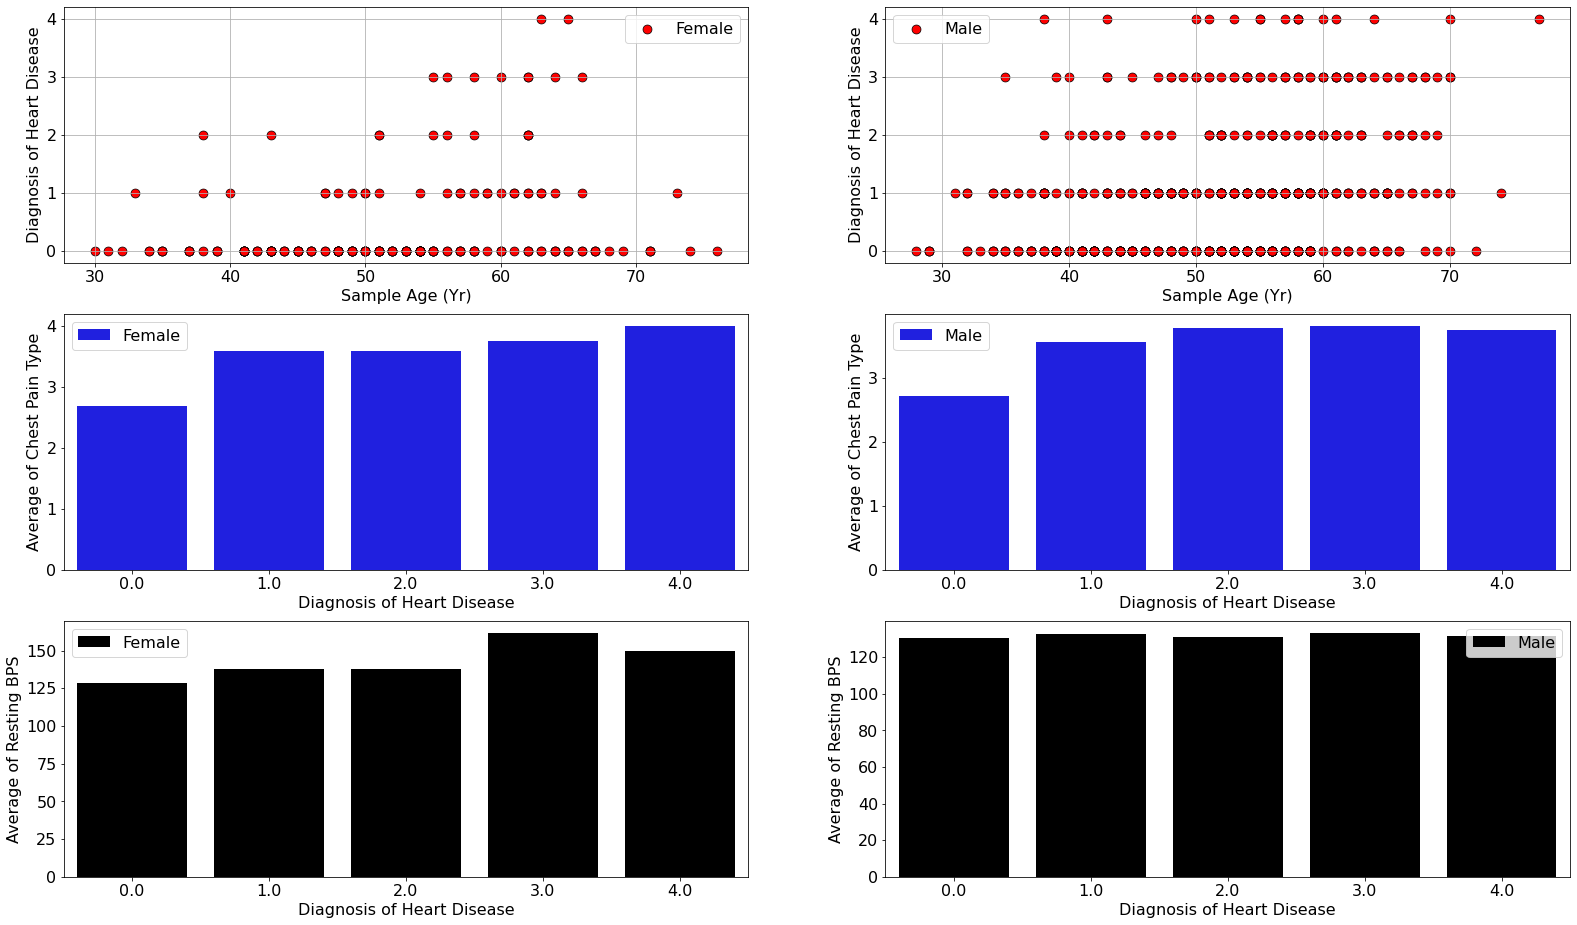

In [7]:
fig, axis = plt.subplots(3,2,figsize=(27,16))

sns.scatterplot(data = heart.loc[heart['sex']==0.0,:], x = 'age', y = 'num', color = 'red',ax = axis[0,0], marker = 'o',
                label = 'Female', edgecolor='black', s = 80)
axis[0,0].set_xlabel('Sample Age (Yr)',fontsize=16)
axis[0,0].set_ylabel('Diagnosis of Heart Disease',fontsize=16)
axis[0,0].tick_params(axis='both',labelsize=16)
axis[0,0].legend(fontsize=16)
axis[0,0].grid()

sns.scatterplot(data = heart.loc[heart['sex']==1.0,:], x = 'age', y = 'num', color = 'red',ax = axis[0,1],marker = 'o',
                label = 'Male',edgecolor='black', s = 80)
axis[0,1].set_xlabel('Sample Age (Yr)',fontsize=16)
axis[0,1].set_ylabel('Diagnosis of Heart Disease',fontsize=16)
axis[0,1].tick_params(axis='both',labelsize=16)
axis[0,1].legend(fontsize=16)
axis[0,1].grid()

df = heart.loc[heart['sex']==0.0,:].groupby(['num'])['cp'].aggregate(['mean'])
df.reset_index(inplace=True)
df.columns = ['num','cp']

sns.barplot(data = df, x = 'num', y = 'cp', color = 'blue',ax = axis[1,0], label = 'Female')
axis[1,0].set_ylabel('Average of Chest Pain Type',fontsize=16)
axis[1,0].set_xlabel('Diagnosis of Heart Disease',fontsize=16)
axis[1,0].tick_params(axis='both',labelsize=16)
axis[1,0].legend(fontsize=16)

df = heart.loc[heart['sex']==1.0,:].groupby(['num'])['cp'].aggregate(['mean'])
df.reset_index(inplace=True)
df.columns = ['num','cp']

sns.barplot(data = df, x = 'num', y = 'cp', color = 'blue',ax = axis[1,1], label = 'Male')
axis[1,1].set_ylabel('Average of Chest Pain Type',fontsize=16)
axis[1,1].set_xlabel('Diagnosis of Heart Disease',fontsize=16)
axis[1,1].tick_params(axis='both',labelsize=16)
axis[1,1].legend(fontsize=16)

df = heart.loc[heart['sex']==0.0,:].groupby(['num'])['trestbps'].aggregate(['mean'])
df.reset_index(inplace=True)
df.columns = ['num','trestbps']

sns.barplot(data = df, y = 'trestbps', x = 'num', color = 'black',ax = axis[2,0], label = 'Female')
axis[2,0].set_ylabel('Average of Resting BPS',fontsize=16)
axis[2,0].set_xlabel('Diagnosis of Heart Disease',fontsize=16)
axis[2,0].tick_params(axis='both',labelsize=16)
axis[2,0].legend(fontsize=16)

df = heart.loc[heart['sex']==1.0,:].groupby(['num'])['trestbps'].aggregate(['mean'])
df.reset_index(inplace=True)
df.columns = ['num','trestbps']

sns.barplot(data = df, y = 'trestbps', x = 'num', color = 'black',ax = axis[2,1], label = 'Male')
axis[2,1].set_ylabel('Average of Resting BPS',fontsize=16)
axis[2,1].set_xlabel('Diagnosis of Heart Disease',fontsize=16)
axis[2,1].tick_params(axis='both',labelsize=16)
axis[2,1].legend(fontsize=16);

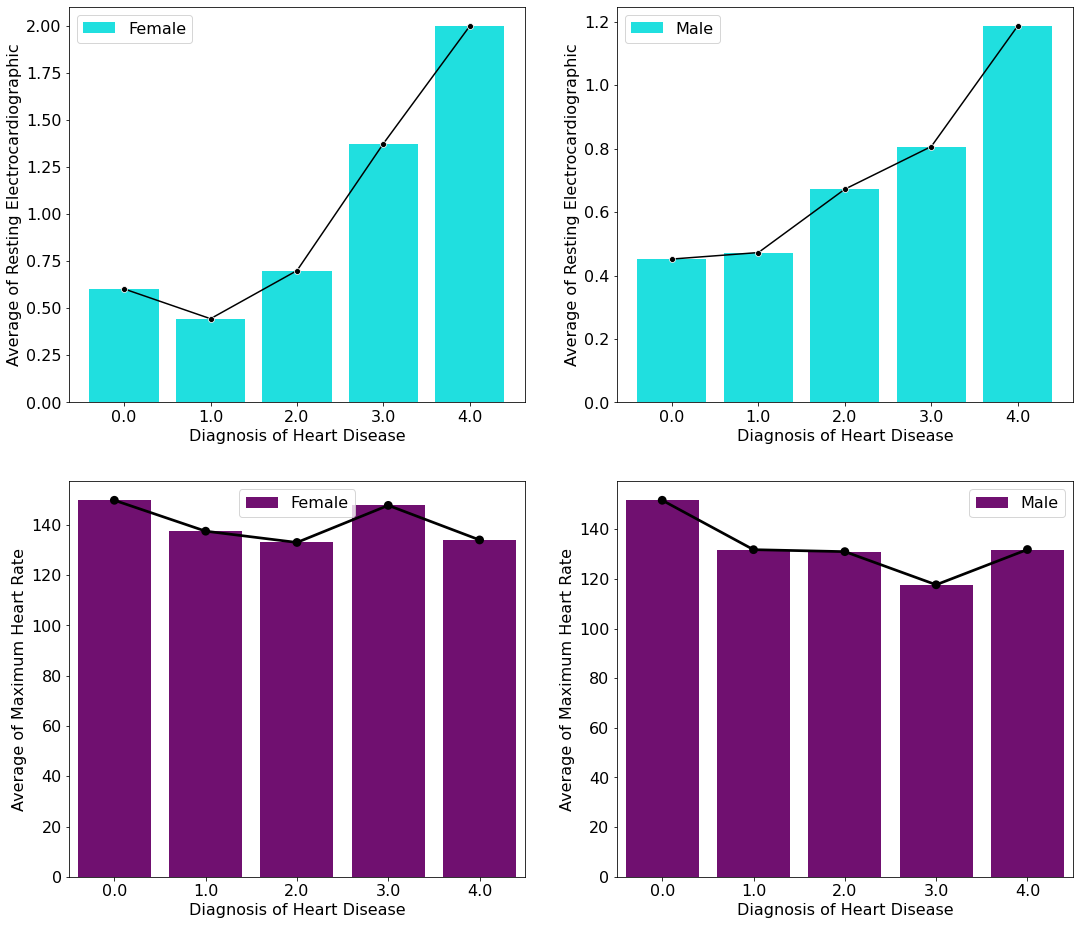

In [8]:
fig, axis = plt.subplots(2,2,figsize=(18,16))

df = heart.loc[heart['sex']==0.0,:].groupby(['num'])['restecg'].aggregate(['mean'])
df.reset_index(inplace=True)
df.columns = ['num','restecg']

sns.barplot(data = df, y = 'restecg', x = 'num', color = 'cyan',ax = axis[0,0], label = 'Female')
sns.lineplot(data = df, y = 'restecg', x = 'num', color = 'black',ax = axis[0,0], marker = 'o')

axis[0,0].set_ylabel('Average of Resting Electrocardiographic',fontsize=16)
axis[0,0].set_xlabel('Diagnosis of Heart Disease',fontsize=16)
axis[0,0].tick_params(axis='both',labelsize=16)
axis[0,0].legend(fontsize=16)

df = heart.loc[heart['sex']==1.0,:].groupby(['num'])['restecg'].aggregate(['mean'])
df.reset_index(inplace=True)
df.columns = ['num','restecg']

sns.barplot(data = df, y = 'restecg', x = 'num', color = 'cyan',ax = axis[0,1], label = 'Male')
sns.lineplot(data = df, y = 'restecg', x = 'num', color = 'black',ax = axis[0,1], marker = 'o')

axis[0,1].set_ylabel('Average of Resting Electrocardiographic',fontsize=16)
axis[0,1].set_xlabel('Diagnosis of Heart Disease',fontsize=16)
axis[0,1].tick_params(axis='both',labelsize=16)
axis[0,1].legend(fontsize=16)

df = heart.loc[heart['sex']==0.0,:].groupby(['num'])['thalach'].aggregate(['mean'])
df.reset_index(inplace=True)
df.columns = ['num','thalach']

sns.barplot(data = df, y = 'thalach', x = 'num', color = 'purple',ax = axis[1,0], label = 'Female')
sns.pointplot(data = df, y = 'thalach', x = 'num', color = 'black',ax = axis[1,0])

axis[1,0].set_ylabel('Average of Maximum Heart Rate',fontsize=16)
axis[1,0].set_xlabel('Diagnosis of Heart Disease',fontsize=16)
axis[1,0].tick_params(axis='both',labelsize=16)
axis[1,0].legend(fontsize=16)

df = heart.loc[heart['sex']==1.0,:].groupby(['num'])['thalach'].aggregate(['mean'])
df.reset_index(inplace=True)
df.columns = ['num','thalach']

sns.barplot(data = df, y = 'thalach', x = 'num', color = 'purple',ax = axis[1,1], label = 'Male')
sns.pointplot(data = df, y = 'thalach', x = 'num', color = 'black',ax = axis[1,1])

axis[1,1].set_ylabel('Average of Maximum Heart Rate',fontsize=16)
axis[1,1].set_xlabel('Diagnosis of Heart Disease',fontsize=16)
axis[1,1].tick_params(axis='both',labelsize=16)
axis[1,1].legend(fontsize=16);

In [9]:
from sklearn.decomposition import PCA

In [10]:
number_comp = 5
pca = PCA(n_components = number_comp)
pca_data = pca.fit_transform(heart)
df = pd.DataFrame(data = pca_data, columns = ['feature_'+str(i) for i in range(number_comp)])
pca_df = pd.DataFrame(data = pca.components_.T, index = heart.columns, columns=['feature_'+str(i) for i in range(number_comp)])
pca_df.reset_index(inplace=True)

In [11]:
pca_data.shape

(720, 5)

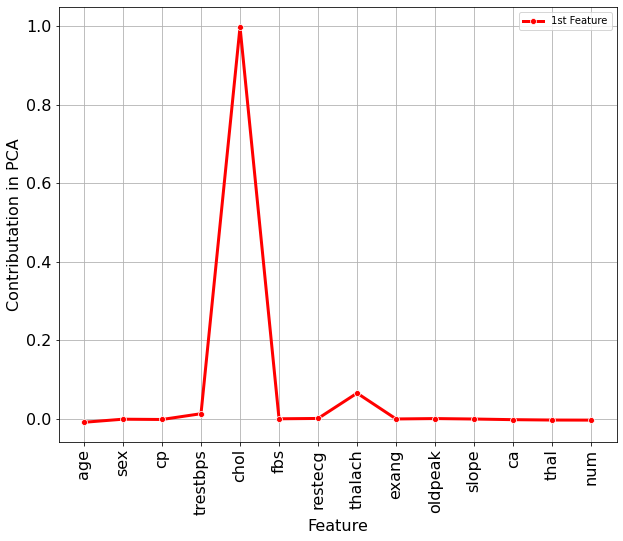

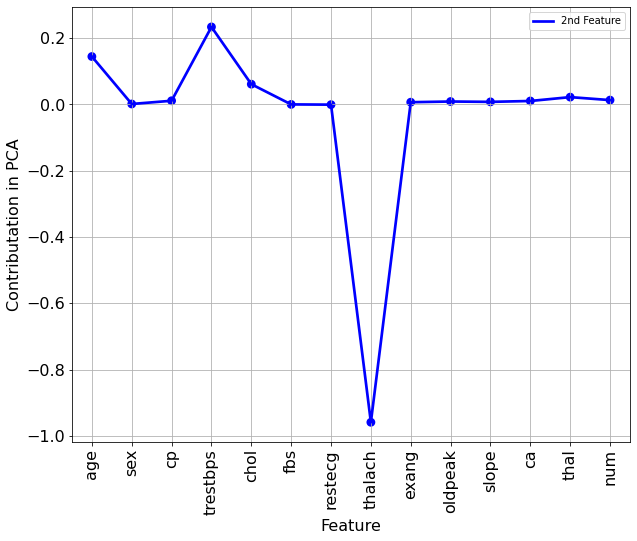

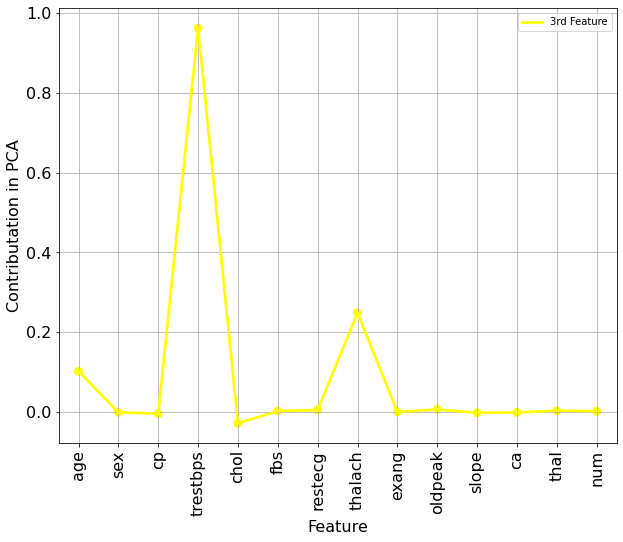

In [12]:
fig, ax = plt.subplots(1,1,figsize=(10,8))
sns.lineplot(data = pca_df, x = 'index', y = 'feature_0', color = 'red', ax = ax, linewidth = 3,
              label = '1st Feature', marker = 'o')

ax.tick_params(axis='x',labelsize=12, labelrotation = 90)
ax.tick_params(axis='both',labelsize=16)
ax.set_xlabel('Feature', fontsize= 16)
ax.set_ylabel('Contributation in PCA', fontsize= 16)
ax.grid()
ax.legend();

fig, ax = plt.subplots(1,1,figsize=(10,8))
sns.pointplot(data = pca_df, x = 'index', y = 'feature_1', color = 'blue', ax = ax, linewidth = 3,
              label = '2nd Feature', marker = 's')
ax.tick_params(axis='x',labelsize=12, labelrotation = 90)
ax.tick_params(axis='both',labelsize=16)
ax.set_xlabel('Feature', fontsize= 16)
ax.set_ylabel('Contributation in PCA', fontsize= 16)
ax.grid()
plt.legend(['2nd Feature']);

fig, ax = plt.subplots(1,1,figsize=(10,8))
sns.pointplot(data = pca_df, x = 'index', y = 'feature_2', color = 'yellow', ax = ax, linewidth = 3,
              label = '3rd Feature', marker = '*')
ax.tick_params(axis='x',labelsize=12, labelrotation = 90)
ax.tick_params(axis='both',labelsize=16)
ax.set_xlabel('Feature', fontsize= 16)
ax.set_ylabel('Contributation in PCA', fontsize= 16)
ax.grid()
plt.legend(['3rd Feature'])

In [13]:
from sklearn.decomposition import FastICA

In [14]:
number  = 5
transformer = FastICA(n_components = number, random_state = 144, whiten='unit-variance')
ICA_data = transformer.fit_transform(heart.values)

In [15]:
ICA_df = pd.DataFrame(data = transformer.components_.T, index = heart.columns, 
                      columns=['feature_'+str(i) for i in range(number)])
ICA_df.reset_index(inplace=True)

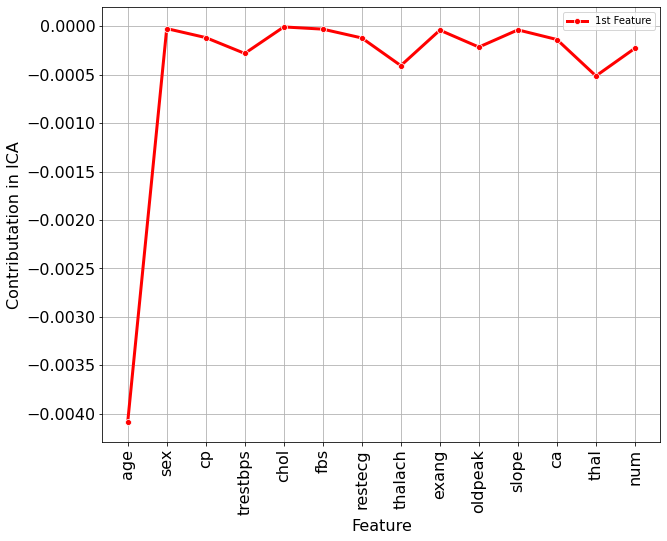

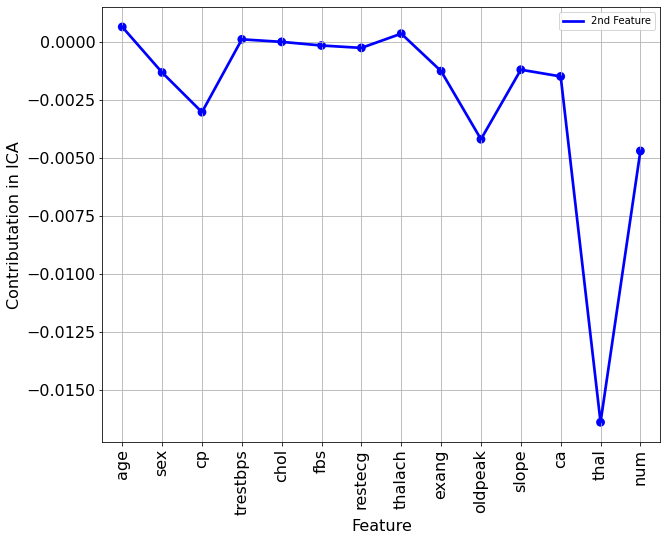

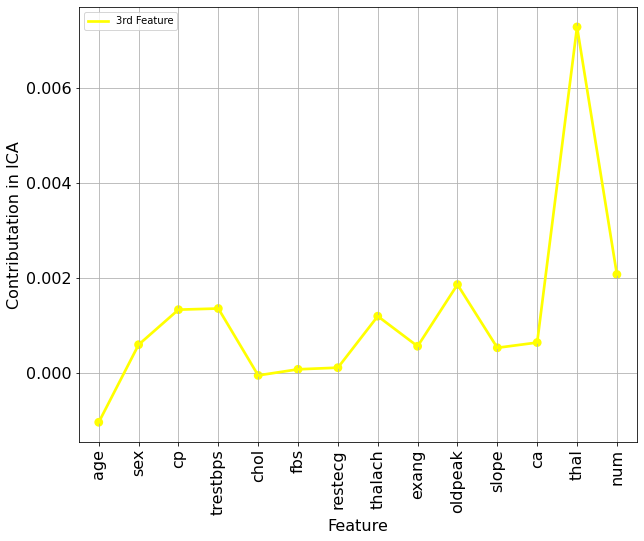

In [17]:
fig, ax = plt.subplots(1,1,figsize=(10,8))
sns.lineplot(data = ICA_df, x = 'index', y = 'feature_0', color = 'red', ax = ax, linewidth = 3,
              label = '1st Feature', marker = 'o')
ax.tick_params(axis='x',labelsize=12, labelrotation = 90)
ax.tick_params(axis='both',labelsize=16)
ax.set_xlabel('Feature', fontsize= 16)
ax.set_ylabel('Contributation in ICA', fontsize= 16)
ax.grid()
ax.legend();

fig, ax = plt.subplots(1,1,figsize=(10,8))
sns.pointplot(data = ICA_df, x = 'index', y = 'feature_1', color = 'blue', ax = ax, linewidth = 3,
              label = '2nd Feature', marker = 's')
ax.tick_params(axis='x',labelsize=12, labelrotation = 90)
ax.tick_params(axis='both',labelsize=16)
ax.set_xlabel('Feature', fontsize= 16)
ax.set_ylabel('Contributation in ICA', fontsize= 16)
ax.grid()
plt.legend(['2nd Feature']);

fig, ax = plt.subplots(1,1,figsize=(10,8))
sns.pointplot(data = ICA_df, x = 'index', y = 'feature_2', color = 'yellow', ax = ax, linewidth = 3,
              label = '3rd Feature', marker = '*')
ax.tick_params(axis='x',labelsize=12, labelrotation = 90)
ax.tick_params(axis='both',labelsize=16)
ax.set_xlabel('Feature', fontsize= 16)
ax.set_ylabel('Contributation in ICA', fontsize= 16)
ax.grid()
plt.legend(['3rd Feature']);

In [18]:
from sklearn.decomposition import FactorAnalysis

In [19]:
transformer = FactorAnalysis(n_components=number, random_state=144)
factor_data = transformer.fit_transform(heart.values)
factor_df = pd.DataFrame(data = transformer.components_.T, columns = ['feature_'+str(i) for i in range(number)])

In [20]:
factor_df['index'] = heart.columns

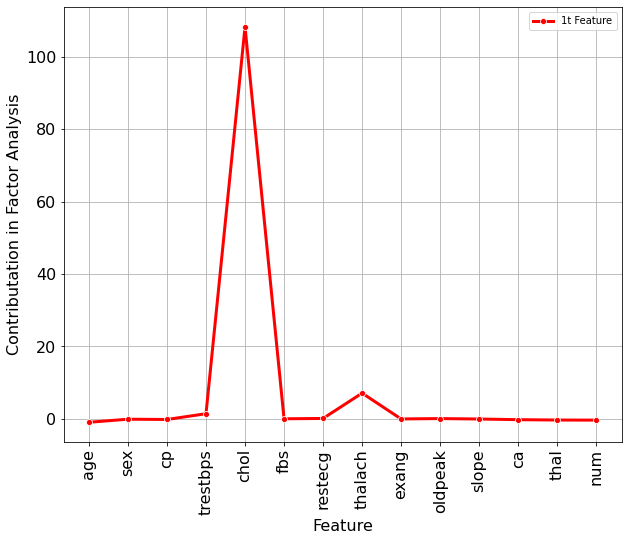

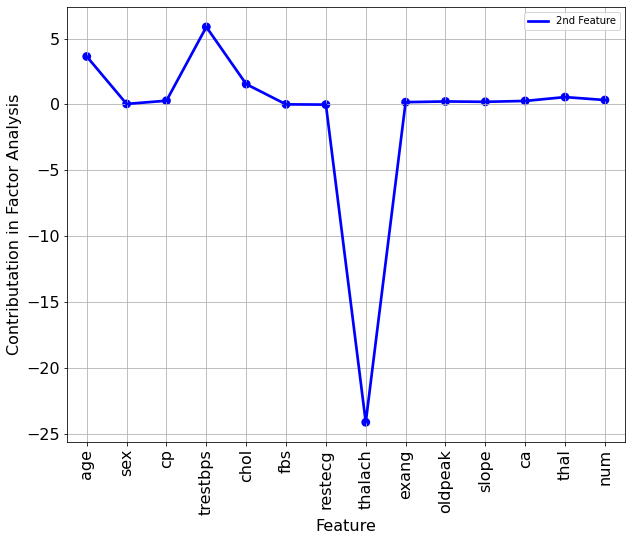

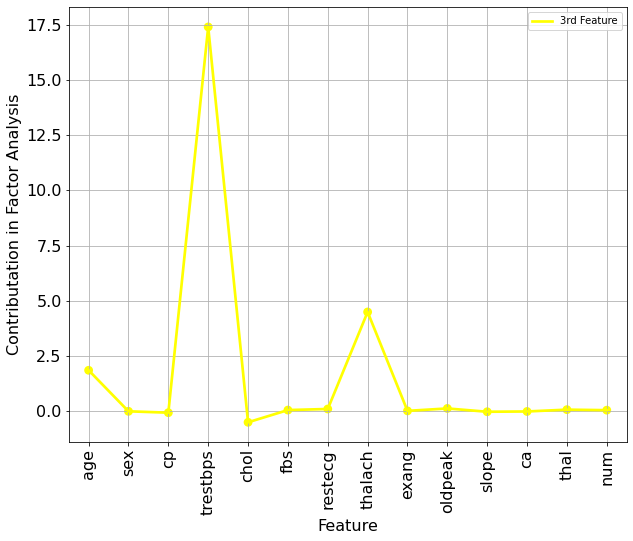

In [22]:
fig, ax = plt.subplots(1,1,figsize=(10,8))
sns.lineplot(data = factor_df, x = 'index', y = 'feature_0', color = 'red', ax = ax, linewidth = 3,
              label = '1st Feature', marker = 'o')
ax.tick_params(axis='x',labelsize=12, labelrotation = 90)
ax.tick_params(axis='both',labelsize=16)
ax.set_xlabel('Feature', fontsize= 16)
ax.set_ylabel('Contributation in Factor Analysis', fontsize= 16)
ax.grid()
ax.legend(['1t Feature']);

fig, ax = plt.subplots(1,1,figsize=(10,8))
sns.pointplot(data = factor_df, x = 'index', y = 'feature_1', color = 'blue', ax = ax, linewidth = 3,
              label = '2nd Feature', marker = 's')
ax.tick_params(axis='x',labelsize=12, labelrotation = 90)
ax.tick_params(axis='both',labelsize=16)
ax.set_xlabel('Feature', fontsize= 16)
ax.set_ylabel('Contributation in Factor Analysis', fontsize= 16)
ax.grid()
plt.legend(['2nd Feature']);

fig, ax = plt.subplots(1,1,figsize=(10,8))
sns.pointplot(data = factor_df, x = 'index', y = 'feature_2', color = 'yellow', ax = ax, linewidth = 3,
              label = '3rd Feature', marker = '*')
ax.tick_params(axis='x',labelsize=12, labelrotation = 90)
ax.tick_params(axis='both',labelsize=16)
ax.set_xlabel('Feature', fontsize= 16)
ax.set_ylabel('Contributation in Factor Analysis', fontsize= 16)
ax.grid()
plt.legend(['3rd Feature']);

In [23]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest 

In [24]:
MIR = mutual_info_classif

In [25]:
X = heart.drop(['num'],axis=1)
Y = heart.loc[:,'num']

In [26]:
MIRfun = SelectKBest(score_func = MIR, k='all')

In [27]:
MIRfit = MIRfun.fit(X,Y)

In [28]:
MIR_score = MIRfit.get_support()
MIR_score

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

In [29]:
MIRfit.scores_

array([0.03390224, 0.0233248 , 0.18919914, 0.02793311, 0.10841112,
       0.02511183, 0.        , 0.10013663, 0.14033158, 0.13984506,
       0.08317745, 0.12785505, 0.08420209])

In [30]:
data = zip(X.columns, MIRfit.scores_)
data = sorted(data, key = lambda x:x[1], reverse=True)
MIR_df = pd.DataFrame(data = data)
MIR_df.columns = ['feature','score']

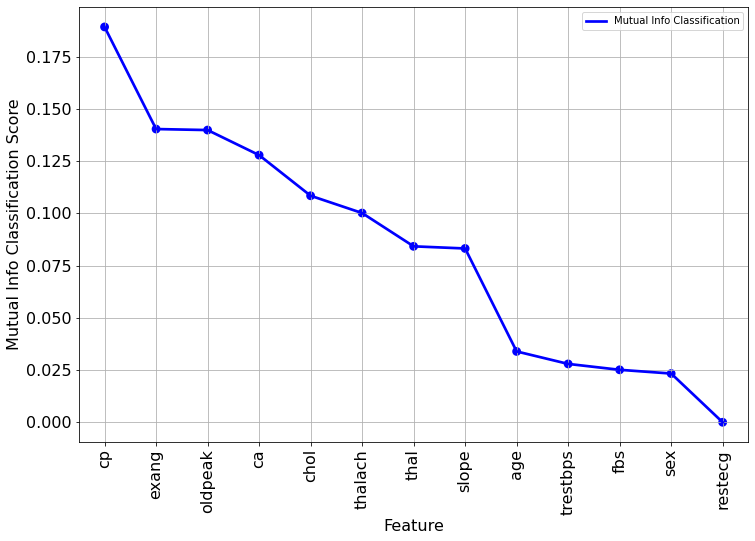

In [31]:
fig, ax = plt.subplots(1,1,figsize=(12,8))
sns.pointplot(data = MIR_df, x = 'feature', y = 'score', color = 'blue', ax = ax, linewidth = 3,
              label = 'Mutual Info Classification', marker = '*')
ax.tick_params(axis='x',labelsize=12, labelrotation = 90)
ax.tick_params(axis='both',labelsize=16)
ax.set_xlabel('Feature', fontsize= 16)
ax.set_ylabel('Mutual Info Classification Score', fontsize= 16)
ax.grid()
plt.legend(['Mutual Info Classification']);

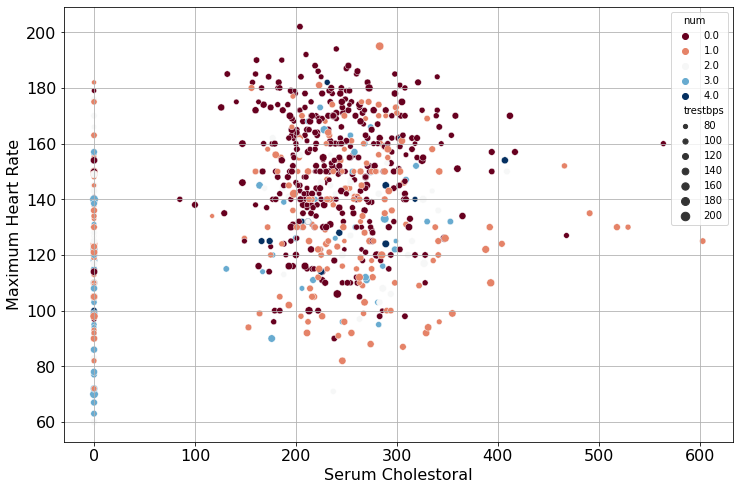

In [32]:
#important features based on PCA : chol,thalach, trestbps
fig, ax = plt.subplots(1,1,figsize=(12,8))
sns.scatterplot(data = heart, x = 'chol', y = 'thalach', hue = 'num', size = 'trestbps', palette='RdBu')
#ax.tick_params(axis='x',labelsize=12, labelrotation = 90)
ax.tick_params(axis='both',labelsize=16)
ax.set_xlabel('Serum Cholestoral', fontsize= 16)
ax.set_ylabel('Maximum Heart Rate', fontsize= 16)
ax.grid()
plt.cm.ScalarMappable(cmap="RdBu");

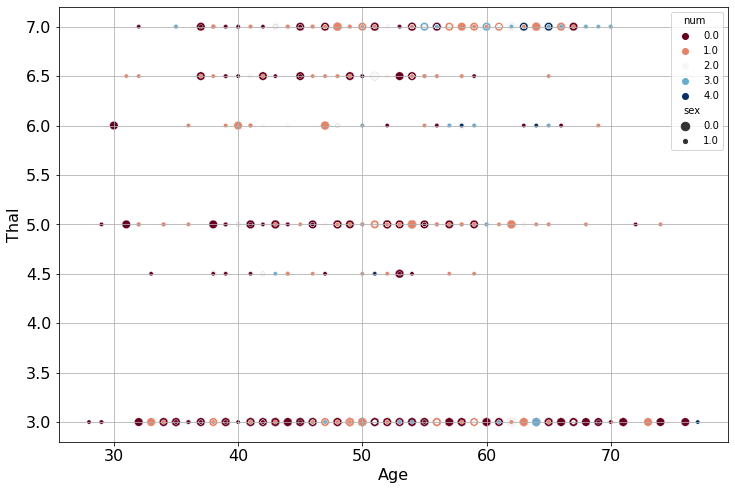

In [33]:
#important features based on ICA : age,thal
fig, ax = plt.subplots(1,1,figsize=(12,8))
sns.scatterplot(data = heart, x = 'age', y = 'thal', hue = 'num', size = 'sex', palette='RdBu')
#ax.tick_params(axis='x',labelsize=12, labelrotation = 90)
ax.tick_params(axis='both',labelsize=16)
ax.set_xlabel('Age', fontsize= 16)
ax.set_ylabel('Thal', fontsize= 16)
ax.grid()
plt.cm.ScalarMappable(cmap="RdBu");

In [34]:
pca_data.shape

(720, 5)

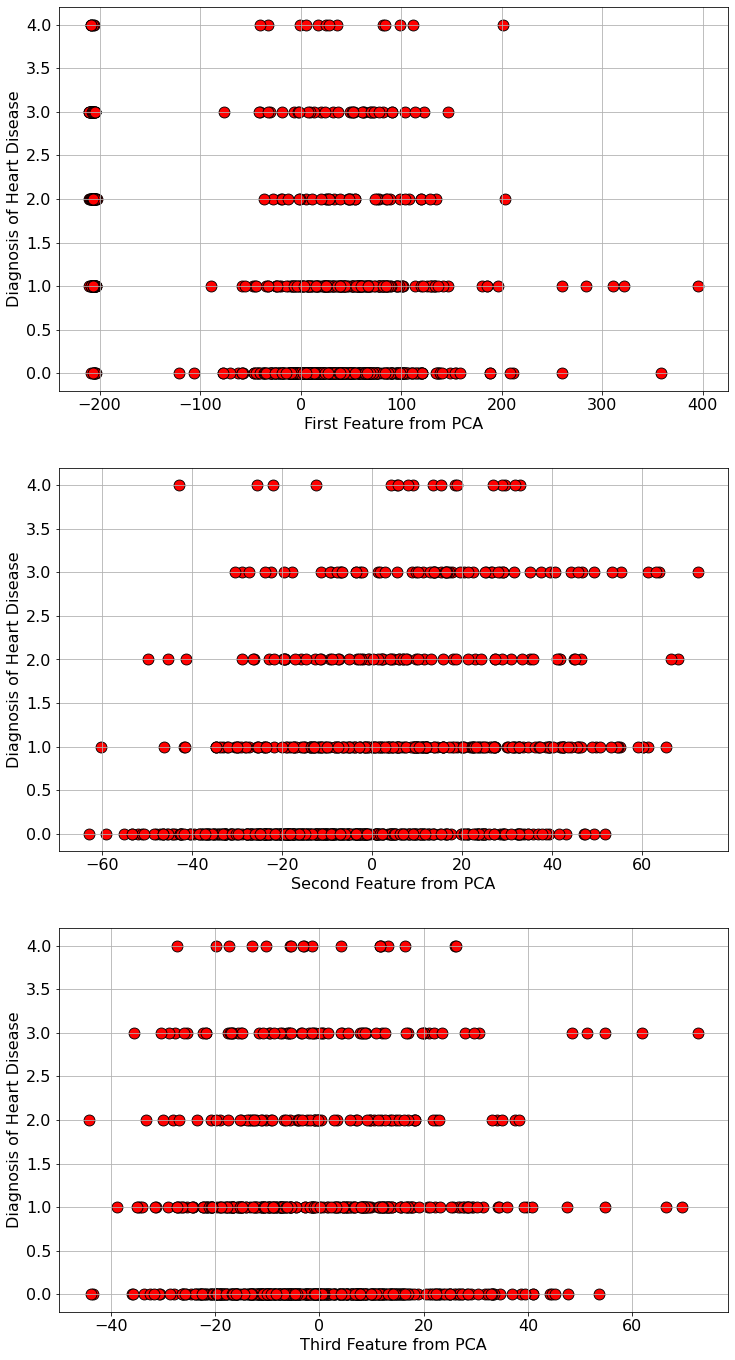

In [45]:
fig, ax = plt.subplots(3,1,figsize=(12,24))
sns.scatterplot(x = pca_data[:,0], y = heart.num.values, ax = ax[0], s = 120, color = 'red', marker = 'o', 
                edgecolor = 'black')
ax[0].tick_params(axis='both',labelsize=16)
ax[0].set_xlabel('First Feature from PCA', fontsize= 16)
ax[0].set_ylabel('Diagnosis of Heart Disease', fontsize= 16)
ax[0].grid()

sns.scatterplot(x = pca_data[:,1], y = heart.num.values, ax = ax[1], s = 120, color = 'red', marker = 'o', 
                edgecolor = 'black')
ax[1].tick_params(axis='both',labelsize=16)
ax[1].set_xlabel('Second Feature from PCA', fontsize= 16)
ax[1].set_ylabel('Diagnosis of Heart Disease', fontsize= 16)
ax[1].grid()

sns.scatterplot(x = pca_data[:,2], y = heart.num.values, ax = ax[2], s = 120, color = 'red', marker = 'o', 
                edgecolor = 'black')
ax[2].tick_params(axis='both',labelsize=16)
ax[2].set_xlabel('Third Feature from PCA', fontsize= 16)
ax[2].set_ylabel('Diagnosis of Heart Disease', fontsize= 16)
ax[2].grid();

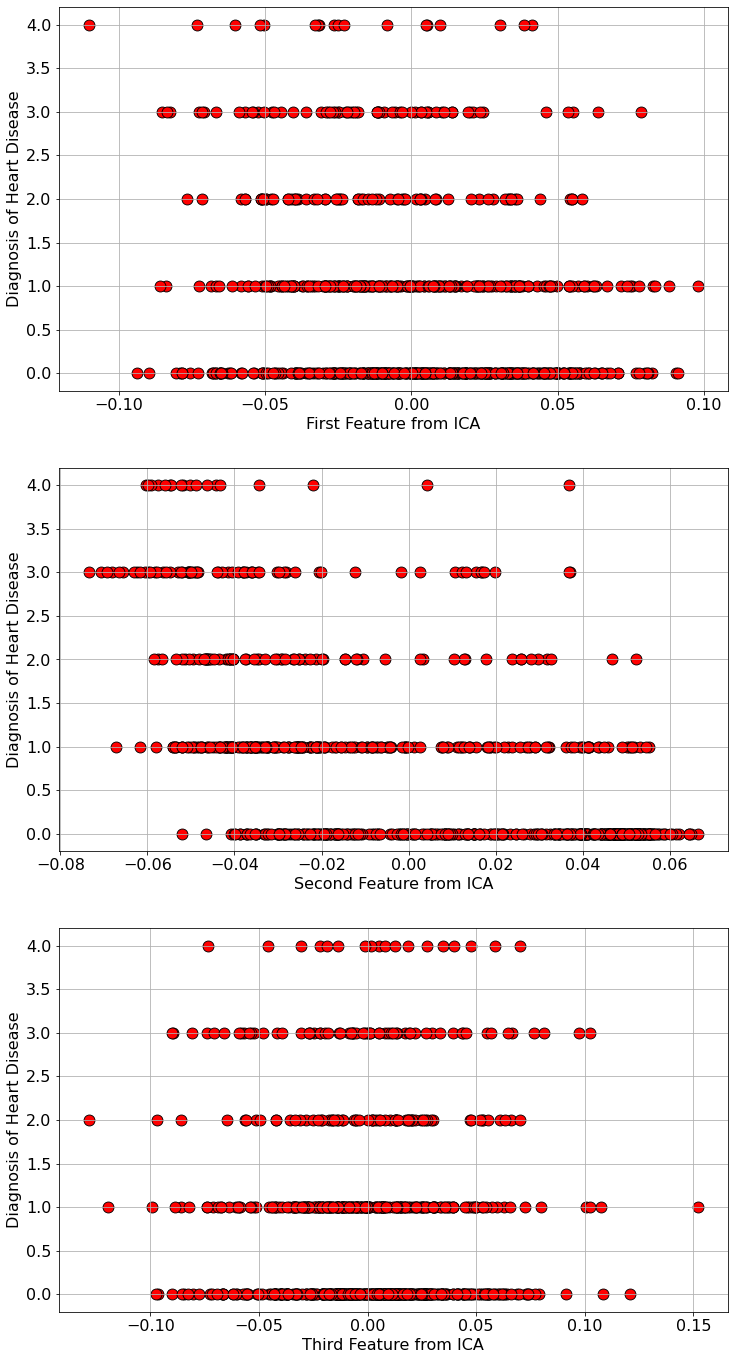

In [48]:
fig, ax = plt.subplots(3,1,figsize=(12,24))
sns.scatterplot(x = ICA_data[:,0], y = heart.num.values, ax = ax[0], s = 120, color = 'red', marker = 'o', 
                edgecolor = 'black')
ax[0].tick_params(axis='both',labelsize=16)
ax[0].set_xlabel('First Feature from ICA', fontsize= 16)
ax[0].set_ylabel('Diagnosis of Heart Disease', fontsize= 16)
ax[0].grid()

sns.scatterplot(x = ICA_data[:,1], y = heart.num.values, ax = ax[1], s = 120, color = 'red', marker = 'o', 
                edgecolor = 'black')
ax[1].tick_params(axis='both',labelsize=16)
ax[1].set_xlabel('Second Feature from ICA', fontsize= 16)
ax[1].set_ylabel('Diagnosis of Heart Disease', fontsize= 16)
ax[1].grid()

sns.scatterplot(x = ICA_data[:,2], y = heart.num.values, ax = ax[2], s = 120, color = 'red', marker = 'o', 
                edgecolor = 'black')
ax[2].tick_params(axis='both',labelsize=16)
ax[2].set_xlabel('Third Feature from ICA', fontsize= 16)
ax[2].set_ylabel('Diagnosis of Heart Disease', fontsize= 16)
ax[2].grid();

In [46]:
ICA_data.shape

(720, 5)